# NIM : 2209106045
# Nama : Dustin Hessel Kopalit

Dataset : [Rice Image Dataset](https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset?resource=download)

Dataset ini merupakan kumpulan citra biji beras dari lima varietas berbeda, Dataset ini memiliki 5 kelas (Arborio, Basmati, Ipsala, Jasmine, dan Karacadag)

##  Import Library

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

## Load dan Preprocessing Dataset

Preprocessing yang digunakan Adalah
- Augmentasi
- Resize
- Normalisasi Piksel

Preprocessing dilakukan untuk menyiapkan data agar sesuai dengan format input model, meningkatkan kualitas data, memperbesar variasi data (augmentasi), dan membantu model belajar lebih efektif serta akurat.

In [ ]:

dataset_path = "D:/SEMESTER 6/VISIKOM/New folder/Rice_Image_dataset"


img_height, img_width = 128, 128
batch_size = 32


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    horizontal_flip=True,
    zoom_range=0.2,
    validation_split=0.2  
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 1200 images belonging to 5 classes.


Found 300 images belonging to 5 classes.


# 3. Implementasi Model Machine Learning

## Membangun Model CNN 

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')  
])

model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,965 (28.20 MB)

 Trainable params: 7,392,965 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

## Melatih Model

In [48]:
epochs = 10

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 16s 398ms/step - accuracy: 0.5147 - loss: 1.1039 - val_accuracy: 0.8533 - val_loss: 0.3584
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 138ms/step - accuracy: 0.8093 - loss: 0.4687 - val_accuracy: 0.8300 - val_loss: 0.3897
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 138ms/step - accuracy: 0.8412 - loss: 0.4006 - val_accuracy: 0.8733 - val_loss: 0.2986
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 142ms/step - accuracy: 0.8720 - loss: 0.3464 - val_accuracy: 0.9133 - val_loss: 0.2115
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 138ms/step - accuracy: 0.8635 - loss: 0.3539 - val_accuracy: 0.9133 - val_loss: 0.2713
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 138ms/step - accuracy: 0.8989 - loss: 0.2742 - val_accuracy: 0.9433 - val_loss: 0.1938
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 138ms/step - accuracy: 0.9096 - loss: 0.2303 - val_accuracy: 0.9200 - val_loss: 0.1893
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 141ms/step - accuracy: 0.9089 - loss: 0.2463 - val_accuracy: 0

## Evaluasi Model dan Visualisasi Akurasi

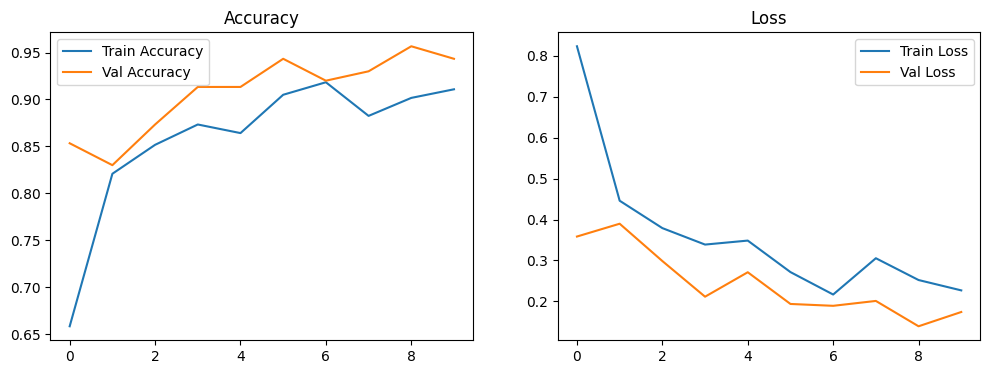

In [49]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Train Accuracy')
plt.plot(val_acc, label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Train Loss')
plt.plot(val_loss, label='Val Loss')
plt.legend()
plt.title('Loss')

plt.show()

# 4. Eksperimen

## Contoh Hasil Prediksi

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


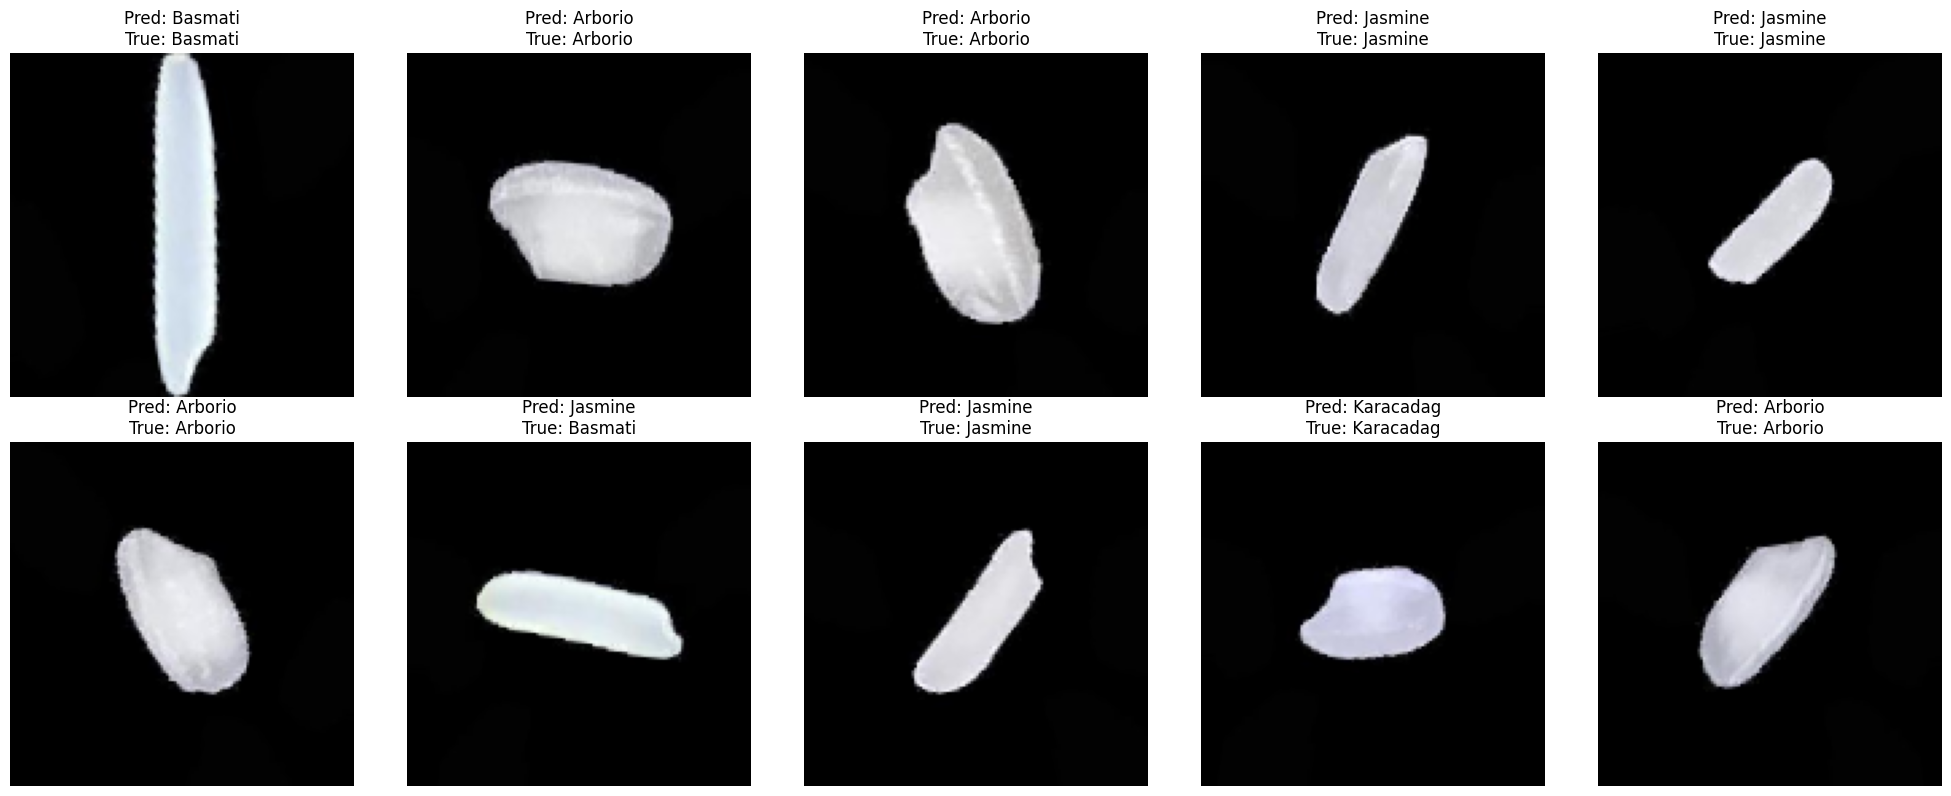

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random


x_val_all = []
y_val_all = []

for i in range(len(val_generator)):
    x_batch, y_batch = val_generator[i]
    x_val_all.extend(x_batch)
    y_val_all.extend(y_batch)

x_val_all = np.array(x_val_all)
y_val_all = np.array(y_val_all)


y_pred_probs = model.predict(x_val_all)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = np.argmax(y_val_all, axis=1)
class_labels = list(val_generator.class_indices.keys())


random_indices = random.sample(range(len(x_val_all)), 10)


plt.figure(figsize=(20, 8))
for i, idx in enumerate(random_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_val_all[idx])
    true_label = class_labels[y_true_labels[idx]]
    pred_label = class_labels[y_pred_labels[idx]]
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()
